In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from plotly.graph_objs import *
import plotly.offline as offline
import datetime
%matplotlib inline
offline.init_notebook_mode() 

### Загружаем датасет с данными об акциях Apple и посмотрим как он выглядит.

Данные загружены с сайта https://www.alphavantage.co/ с помощью функций:

function=TIME_SERIES_DAILY

symbol=AAPL

outputsize=full

apikey=I3SA9EP8MYTPIZJ3

datatype=csv

P.S. также можно читать файл csv по прямой ссылке

In [2]:
COMPANY = ['APPLE', 'GOOGLE', 'FACEBOOK']
СOMPANY_SHARES = ['AAPL', 'GOOGL', 'FB']
link = []
for i in range(len(СOMPANY_SHARES)):
    link.append(str('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='\
           +СOMPANY_SHARES[i]+'&outputsize=full&apikey=I3SA9EP8MYTPIZJ3&datatype=csv'))

In [3]:
APPLE = pd.read_csv(link[0])
APPLE.head()

timestamp     open      high     low   close    volume
0  2020-08-04  436.530  443.1600  433.55  438.66  43198092
1  2020-08-03  432.800  446.5457  431.57  435.75  77037847
2  2020-07-31  411.535  425.6600  403.30  425.04  93573867
3  2020-07-30  376.750  385.1900  375.07  384.76  39532505
4  2020-07-29  375.000  380.9200  374.85  380.16  22582314

#### Берём только данные за последние 10 лет


In [6]:
date = datetime.datetime(datetime.date.today().year-10,datetime.date.today().month,datetime.date.today().day)
APPLE['timestamp'] = pd.to_datetime(APPLE['timestamp'])
APPLE = APPLE[APPLE['timestamp']>=date]

Аналогично загружаем данные о ценах акций Facebook и Google, берём данные за последние 10 лет

In [7]:
GOOGLE = pd.read_csv(link[1])
FACEBOOK = pd.read_csv(link[2])
GOOGLE['timestamp'] = pd.to_datetime(GOOGLE['timestamp'])
GOOGLE = GOOGLE[GOOGLE['timestamp']>=date]
FACEBOOK['timestamp'] = pd.to_datetime(FACEBOOK['timestamp'])
FACEBOOK = FACEBOOK[FACEBOOK['timestamp']>=date]

Разворачиваем датасет, чтобы даты были во временном порядке

In [8]:
APPLE = APPLE.sort_values(by='timestamp')
GOOGLE = GOOGLE.sort_values(by='timestamp')
FACEBOOK = FACEBOOK.sort_values(by='timestamp')
APPLE = APPLE.set_index('timestamp')
GOOGLE = GOOGLE.set_index('timestamp')
FACEBOOK = FACEBOOK.set_index('timestamp')

### Вычисляем daily returns 

In [9]:
APPLE['daily returns'] = np.diff(APPLE['close'].values, axis=0)/(APPLE['close'].iloc[:-1])
FACEBOOK['daily returns'] = np.diff(FACEBOOK['close'].values, axis=0)/(FACEBOOK['close'].iloc[:-1])
GOOGLE['daily returns'] = np.diff(GOOGLE['close'].values, axis=0)/(GOOGLE['close'].iloc[:-1])

### Статистика распределения daily returns для акций APPLE (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение):

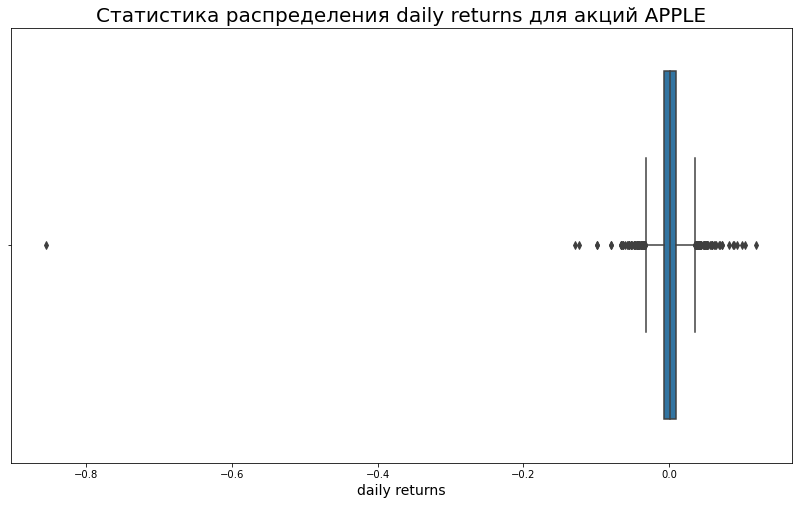

daily returns
count    2516.000000
mean        0.000785
std         0.024390
min        -0.854857
25%        -0.006929
50%         0.000892
75%         0.010018
max         0.119808

In [11]:
APPLE_desc = APPLE[['daily returns']].describe()
plt.figure(figsize=(14,8))
sns.boxplot(APPLE['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций APPLE', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()
APPLE_desc

### Статистика распределения daily returns для акций FACEBOOK (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение)

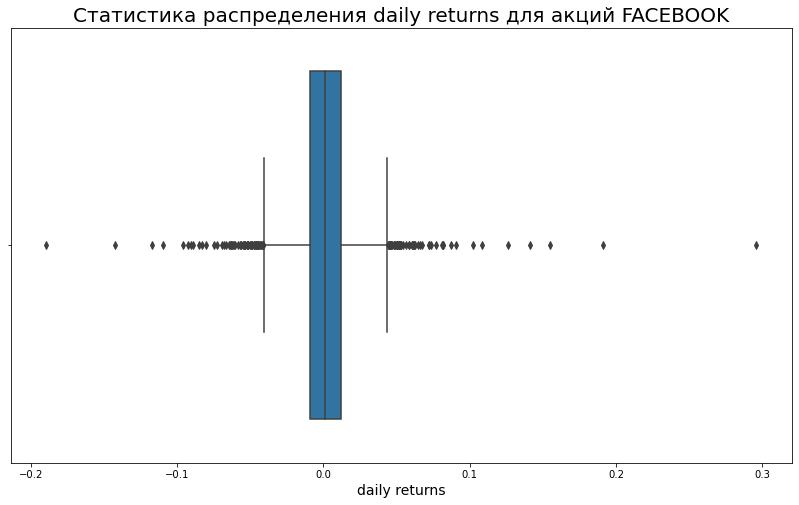

daily returns
count    2065.000000
mean        0.001183
std         0.023530
min        -0.189609
25%        -0.009082
50%         0.001097
75%         0.012065
max         0.296077

In [13]:
FACEBOOK_desc = FACEBOOK[['daily returns']].describe()
plt.figure(figsize=(14,8))
sns.boxplot(FACEBOOK['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций FACEBOOK', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()
FACEBOOK_desc

### Статистика распределения daily returns для акций GOOGLE (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение)

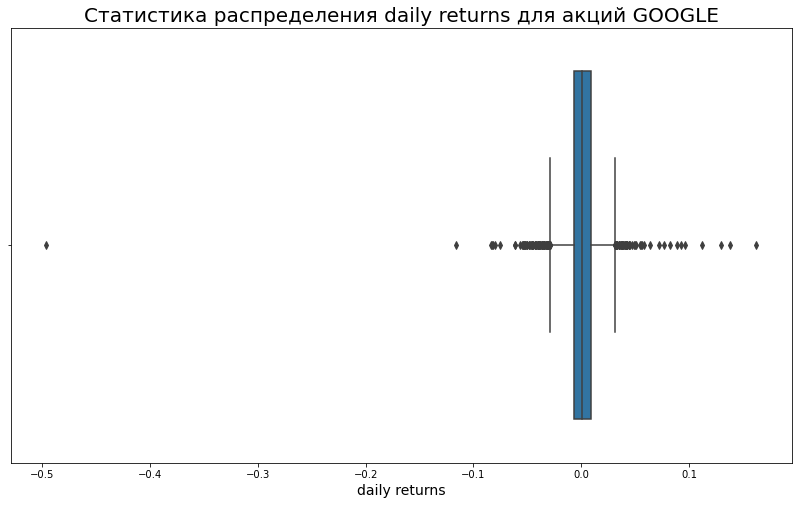

daily returns
count    2516.000000
mean        0.000628
std         0.018962
min        -0.496520
25%        -0.006428
50%         0.000692
75%         0.008637
max         0.162584

In [14]:
GOOGLE_desc = GOOGLE[['daily returns']].describe()
plt.figure(figsize=(14,8))
sns.boxplot(GOOGLE['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций GOOGLE', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()
GOOGLE_desc

### Построим Q-Q графики

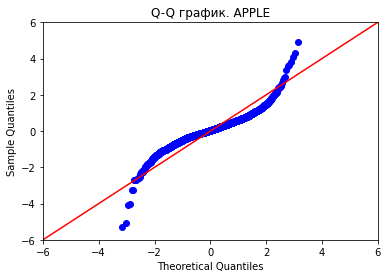

In [23]:
sm.qqplot(data=APPLE['daily returns']/np.std(APPLE['daily returns']), line='45')
plt.title('Q-Q график. APPLE')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

#### Точки нормального графика Q-Q дают представление об одномерной нормальности набора данных. 

#### Данные daily returns APPLE аппрокимируются базовой линией 45 градусов, что позволяет нам предположить о нормальности распределения данных

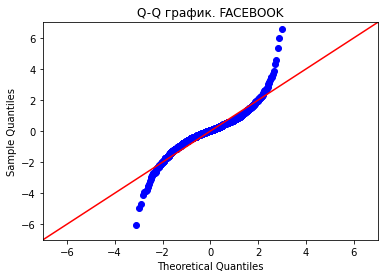

In [27]:
fig = sm.qqplot(data=FACEBOOK['daily returns'].dropna()/np.std(FACEBOOK['daily returns']), line='45')
plt.title('Q-Q график. FACEBOOK')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()

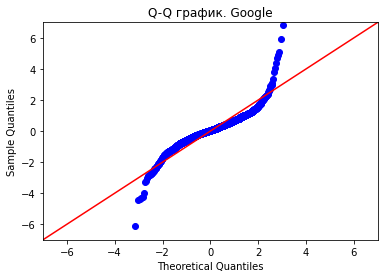

In [29]:
fig = sm.qqplot(data=GOOGLE['daily returns'].dropna()/np.std(GOOGLE['daily returns']), line='45')
plt.title('Q-Q график. Google')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()

## Проведем тест Шапиро-Вилка для проверки схожести с распределением Гаусса

In [30]:
w_apple, pvalue_apple = stats.shapiro(APPLE['daily returns'].dropna())
w_apple, pvalue_apple 

(0.5427958965301514, 0.0)

In [31]:
w_facebook, pvalue_facebook = stats.shapiro(FACEBOOK['daily returns'].dropna())
w_facebook, pvalue_facebook

(0.869345486164093, 1.7901032967557665e-38)

In [32]:
w_google, pvalue_google = stats.shapiro(GOOGLE['daily returns'].dropna())
w_google, pvalue_google

(0.7043213844299316, 0.0)

### Результаты теста Шапиро-Вилка:

Значения w значительно меньше 0.99, а pvalue меньше 0.05.
Из этого можно сделать предположение о том, данные не распределены нормально.

## Построим гистограммы распределения

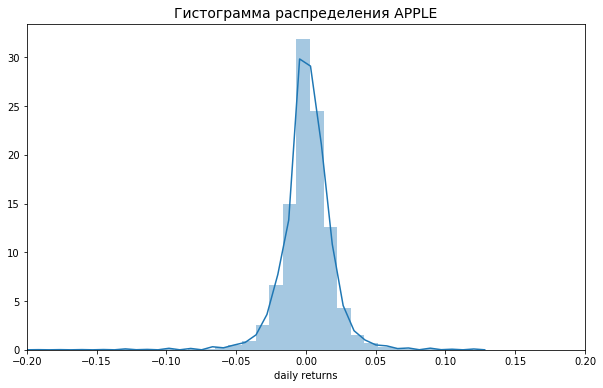

In [154]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(APPLE['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения APPLE',size = 14)
plt.show()

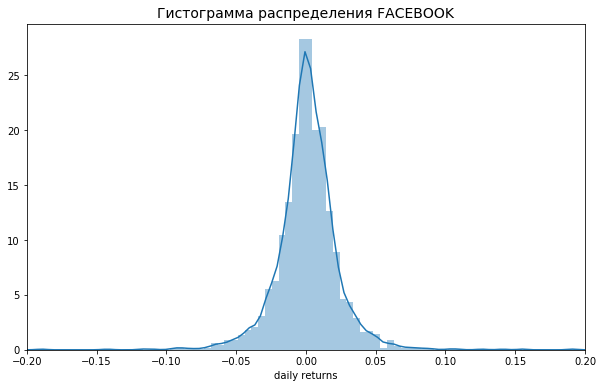

In [155]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(FACEBOOK['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения FACEBOOK',size = 14)
plt.show()

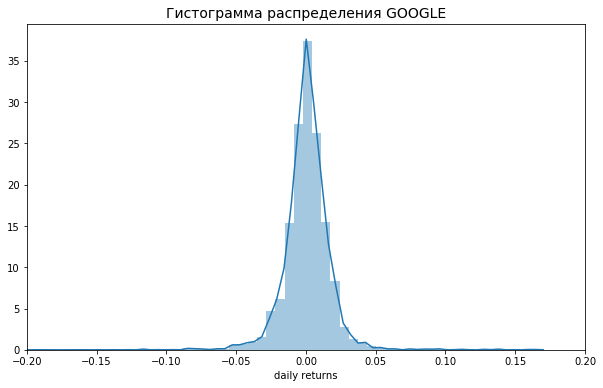

In [156]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(GOOGLE['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения GOOGLE',size = 14)
plt.show()

## Тест Андерсона-Дарлинга

In [157]:
anderson = stats.anderson(APPLE['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные APPLE\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные APPLE\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.786, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.917, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)


In [158]:
anderson = stats.anderson(FACEBOOK['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные FACEBOOK\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные FACEBOOK\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.785, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.916, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)


In [159]:
anderson = stats.anderson(GOOGLE['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные GOOGLE\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные GOOGLE\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.786, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.917, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)


## Построим графики daily returns за последние 10 лет и оценим их стационарность во времени

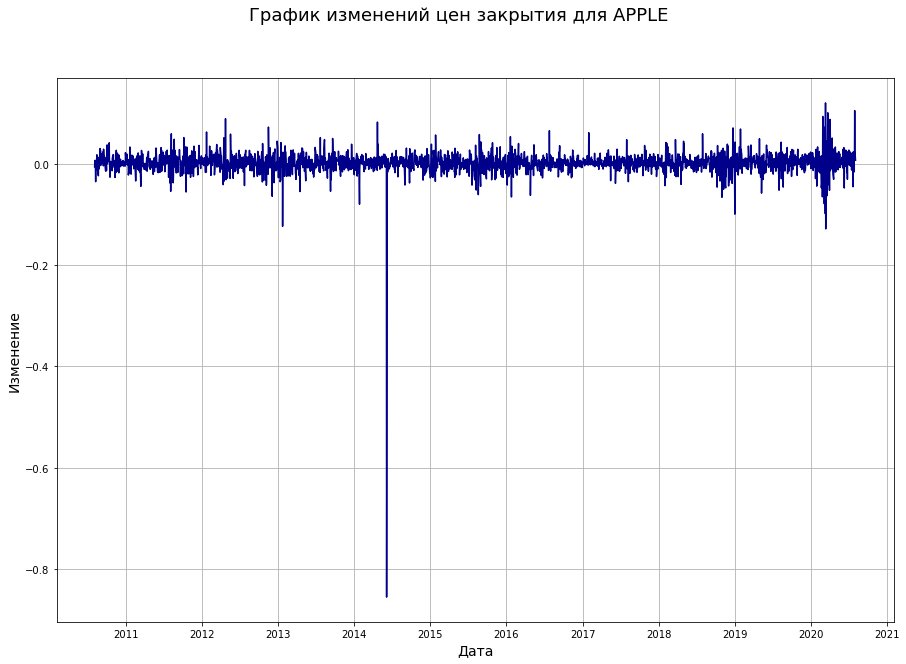

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(APPLE.index, APPLE['daily returns'], color='darkblue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График изменений цен закрытия для APPLE ',size = 18)
plt.show()

### Мы видим сильно изменение 9 июня 2014 года. В этот день Apple приняла решение о дроблении своих акций. Их стало в семь раз больше, а цена каждой упала ровно на столько же. 


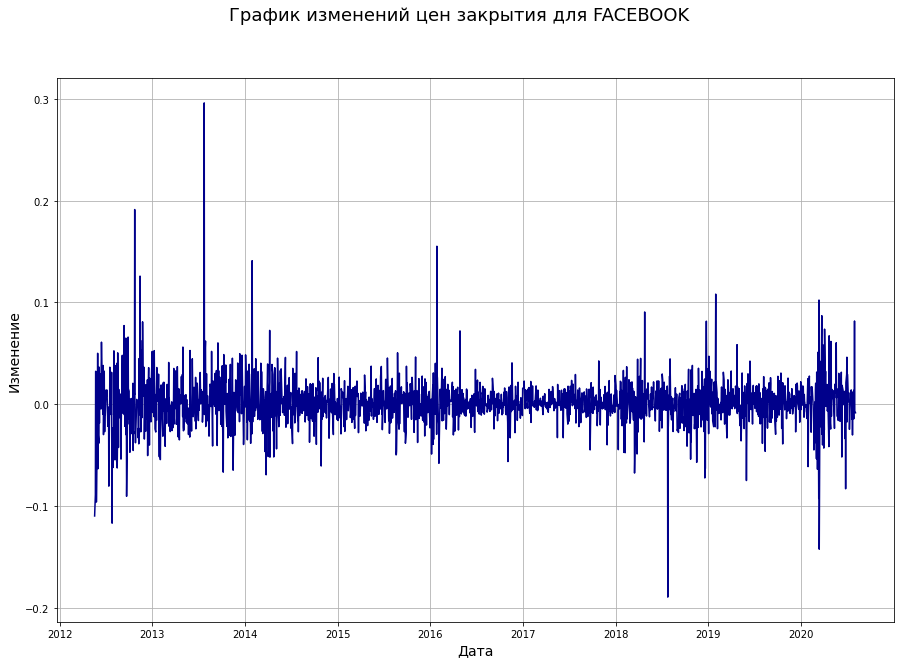

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(FACEBOOK.index, FACEBOOK['daily returns'], color='darkblue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График изменений цен закрытия для FACEBOOK ',size = 18)
plt.show()

### Рассмотрим самые большие изменения на графике.
#### 24 июля 2013 года, когда представители Facebook сообщили о росте продаж мобильной рекламы на 75 процентов за кварта акции компании сильно выросли в цене. 
#### А 25 июля 2018 года акции рухнули после отчёта 2 квартала 2018 года, аналитики прогнозировали лучшие результаты.


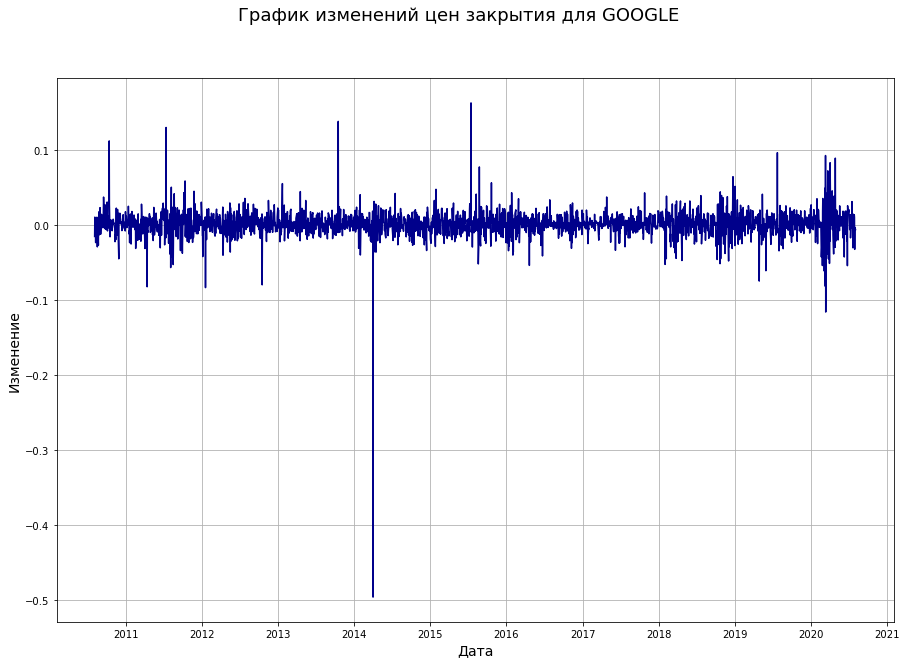

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(GOOGLE.index, GOOGLE['daily returns'], color='darkblue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График изменений цен закрытия для GOOGLE ',size = 18)
plt.show()

 ### В начале апреля компания Google провела сплит акций «2 к 1» Акции упали вдвое, но их стало в два раза больше. На капитализации компании это никак не отразилось. 

### Покажем график стоимости акций компаний

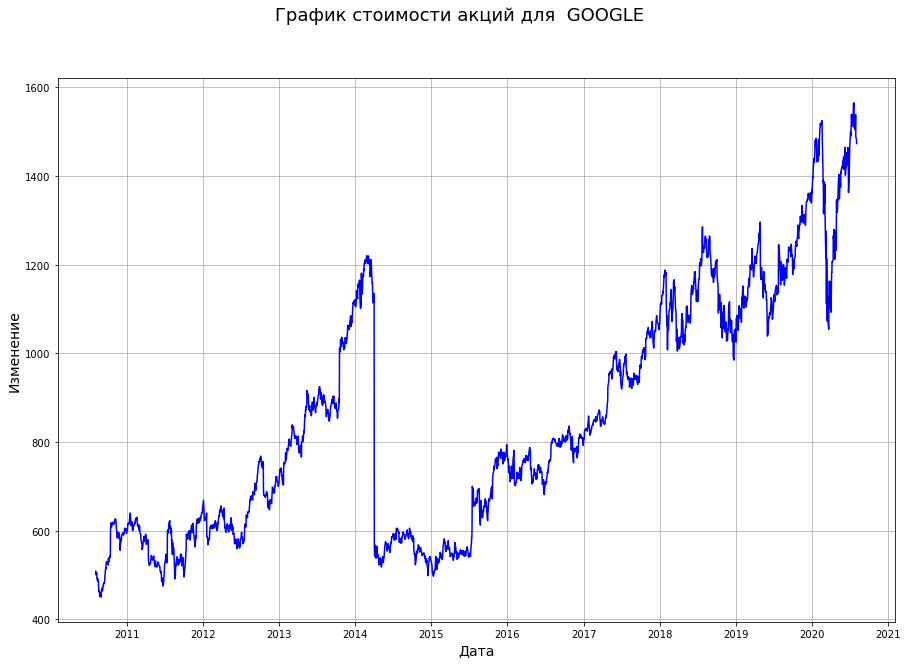

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(GOOGLE.index, GOOGLE['close'], color='blue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График стоимости акций для  GOOGLE ',size = 18)
plt.show()

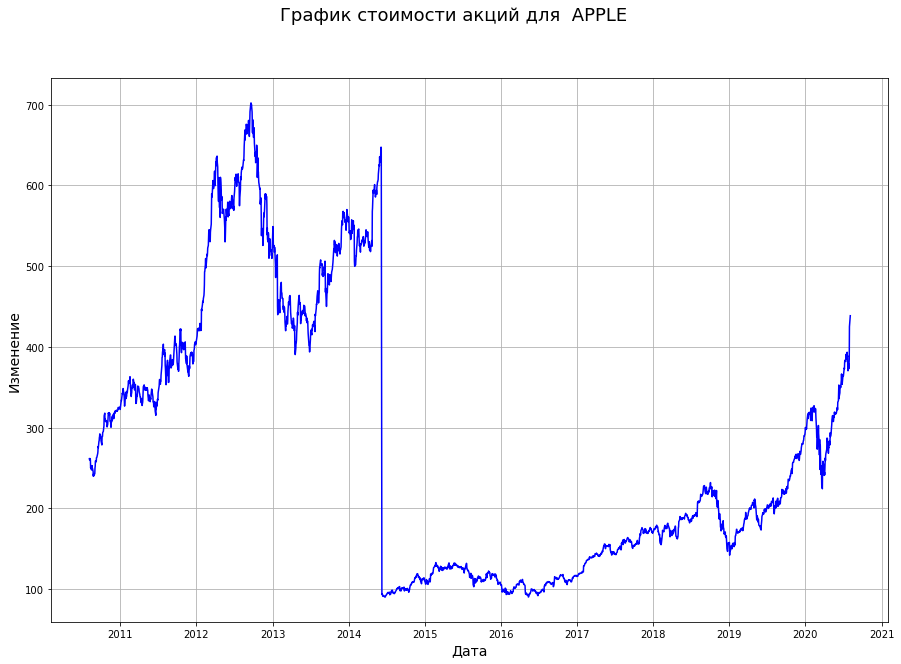

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(APPLE.index, APPLE['close'], color='blue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График стоимости акций для  APPLE ',size = 18)
plt.show()

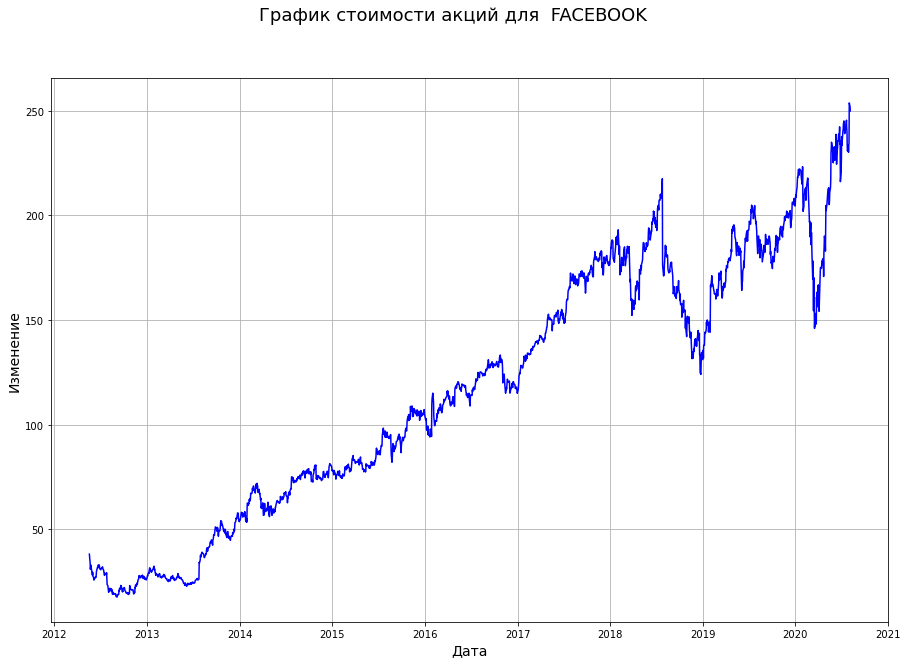

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(FACEBOOK.index, FACEBOOK['close'], color='blue')
plt.xlabel('Дата',size=14)
plt.grid(True)
ax.set_ylabel('Изменение',size=14)
plt.suptitle('График стоимости акций для  FACEBOOK ',size = 18)
plt.show()

## Определим наличие сезонности
### Для этого разложим наши данные на трендовый, сезонный и остаточный компоненты

#### Для GOOGLE:

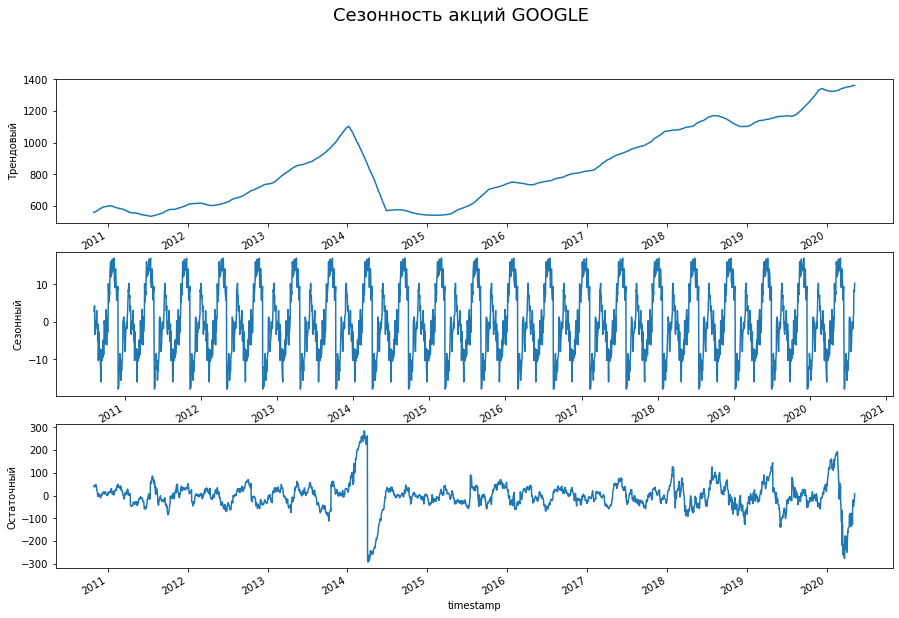

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(GOOGLE.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций GOOGLE', size=18)
plt.show()

#### Для APPLE:

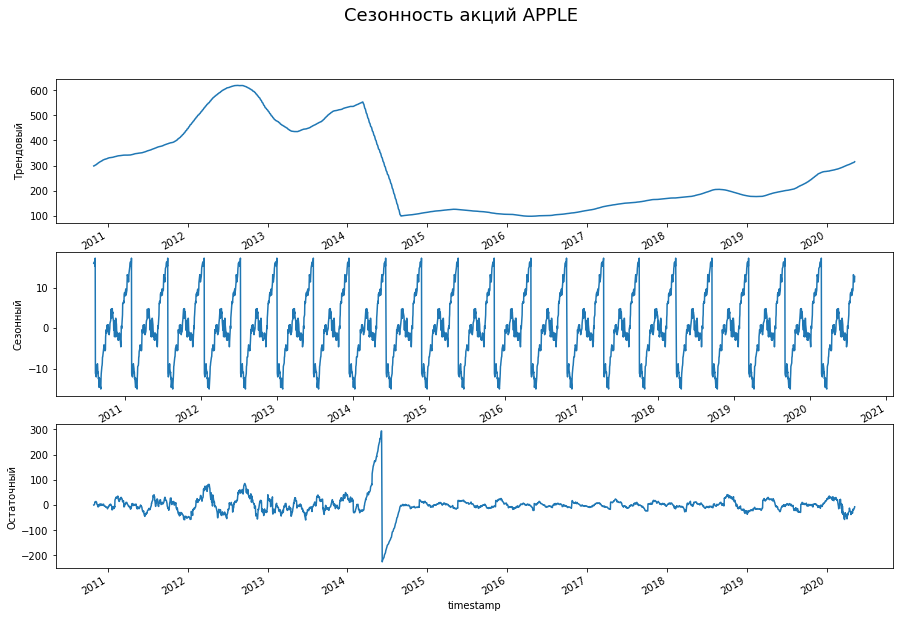

In [40]:
result = seasonal_decompose(APPLE.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций APPLE', size=18)
plt.show()


#### Для FACEBOOK

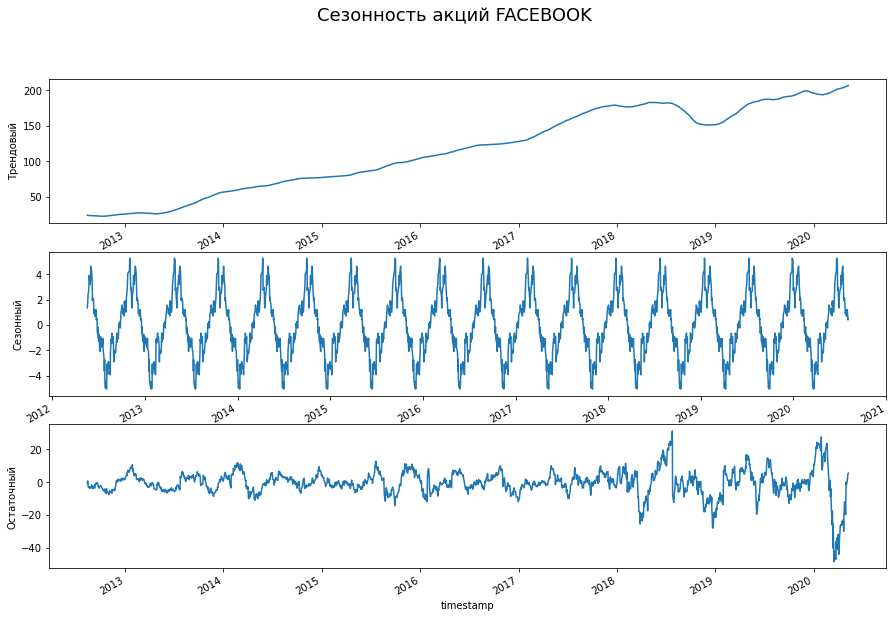

In [41]:
result = seasonal_decompose(FACEBOOK.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций FACEBOOK', size=18)
plt.show()

## Как мы можем заметить стоимость всех акций имеет ярко выраженный тренд и сезонность

## Посчитаем коэффициенты корреляции Спирмена

### Для Google:

In [42]:
GOOGLE_correlation = GOOGLE.corr(method='spearman')
GOOGLE.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999550  0.999404  0.998936 -0.399404      -0.003026
high           0.999550  1.000000  0.999334  0.999458 -0.394303      -0.003320
low            0.999404  0.999334  1.000000  0.999538 -0.406979      -0.002397
close          0.998936  0.999458  0.999538  1.000000 -0.401818      -0.004173
volume        -0.399404 -0.394303 -0.406979 -0.401818  1.000000      -0.013893
daily returns -0.003026 -0.003320 -0.002397 -0.004173 -0.013893       1.000000

### Для FACEBOOK

In [43]:
FACEBOOK_correlation = FACEBOOK.corr(method='spearman')
FACEBOOK.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999673  0.999579  0.999255 -0.615210       0.005017
high           0.999673  1.000000  0.999491  0.999642 -0.609550       0.004599
low            0.999579  0.999491  1.000000  0.999631 -0.622822       0.004142
close          0.999255  0.999642  0.999631  1.000000 -0.616127       0.002617
volume        -0.615210 -0.609550 -0.622822 -0.616127  1.000000       0.001111
daily returns  0.005017  0.004599  0.004142  0.002617  0.001111       1.000000

### Для APPLE

In [44]:
APPLE_correlation = APPLE.corr(method='spearman')
APPLE.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999825  0.999779  0.999585 -0.671767      -0.004747
high           0.999825  1.000000  0.999740  0.999802 -0.668171      -0.005148
low            0.999779  0.999740  1.000000  0.999808 -0.677526      -0.005238
close          0.999585  0.999802  0.999808  1.000000 -0.673043      -0.005837
volume        -0.671767 -0.668171 -0.677526 -0.673043  1.000000      -0.003698
daily returns -0.004747 -0.005148 -0.005238 -0.005837 -0.003698       1.000000

## Посмотрим взаимосвязь между daily returns и остальными параметрами, используя коэффициент корреляции
### Для Google:

In [45]:
GOOGLE_correlation['daily returns'].sort_values(ascending=True)

volume          -0.013893
close           -0.004173
high            -0.003320
open            -0.003026
low             -0.002397
daily returns    1.000000
Name: daily returns, dtype: float64

### Для FACEBOOK

In [46]:
FACEBOOK_correlation['daily returns'].sort_values(ascending=True)

volume           0.001111
close            0.002617
low              0.004142
high             0.004599
open             0.005017
daily returns    1.000000
Name: daily returns, dtype: float64

### Для Apple

In [47]:
APPLE_correlation['daily returns'].sort_values(ascending=True)

close           -0.005837
low             -0.005238
high            -0.005148
open            -0.004747
volume          -0.003698
daily returns    1.000000
Name: daily returns, dtype: float64

## Значения коэффициентов корреляции Спирмена близки к 0, а значит линейная связь между daily returns и другими величинами отсутствует

# Задание 3
### Сгенерируем 3 случайных реализации f1,f2,f3 с величинами, имеющими распределение Гаусса 

In [48]:
f1,f2,f3=[],[],[]
for i in range(len(GOOGLE.dropna().index)):
    f1.append(stats.norm.rvs(0,1))
    f2.append(stats.norm.rvs(0,1))
    f3.append(stats.norm.rvs(0,1))

### Для Google посчитаем значения Profit and Loss и кумулятивную сумму

In [49]:
GOOGLE['pnl1']=GOOGLE['daily returns'].dropna()*f1
GOOGLE['pnl2']=GOOGLE['daily returns'].dropna()*f2
GOOGLE['pnl3']=GOOGLE['daily returns'].dropna()*f3
GOOGLE['cumsum1'] = GOOGLE['pnl1'].apply(lambda x: float(np.cumsum(x)))
GOOGLE['cumsum2'] = GOOGLE['pnl2'].apply(lambda x: float(np.cumsum(x)))
GOOGLE['cumsum3'] = GOOGLE['pnl3'].apply(lambda x: float(np.cumsum(x)))


### Построим графики Profit and Loss

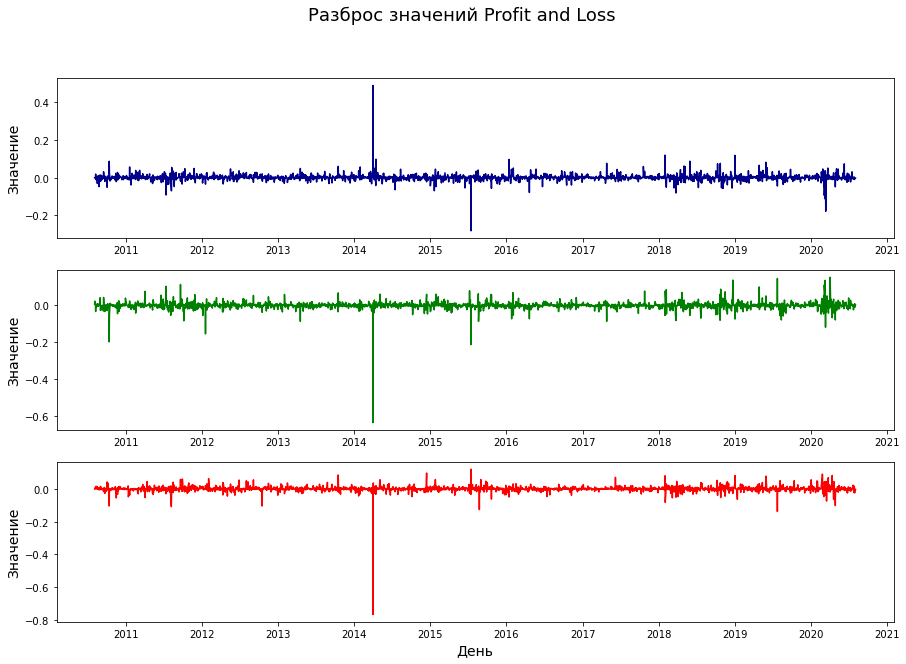

In [50]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
ax1.plot(GOOGLE.index,GOOGLE['pnl1'], color='darkblue')
ax2.plot(GOOGLE.index,GOOGLE['pnl2'], color='green')
ax3.plot(GOOGLE.index,GOOGLE['pnl3'], color='red')
plt.xlabel('День',size=14)
plt.ylabel('Значение',size=14)
ax1.set_ylabel('Значение',size=14)
ax2.set_ylabel('Значение',size=14)
plt.suptitle('Разброс значений Profit and Loss',size = 18)
plt.show()

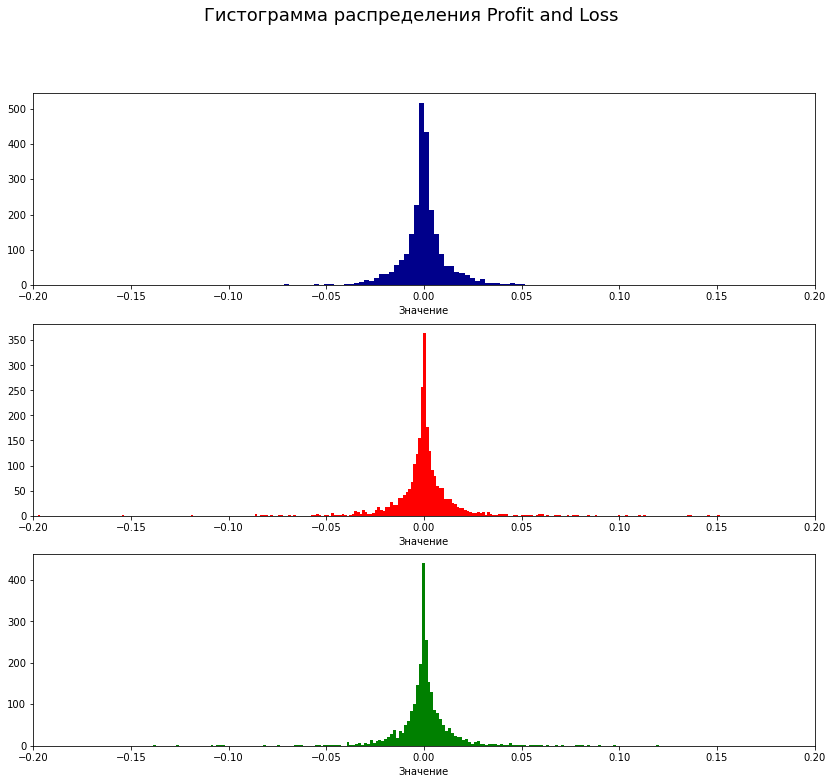

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(14,12))
ax1.hist(GOOGLE['pnl1'].dropna(),bins=300,color='darkblue')
ax2.hist(GOOGLE['pnl2'].dropna(),bins=600,color='red')
ax3.hist(GOOGLE['pnl3'].dropna(),bins=600,color='green')
ax1.set_xlabel('Значение')
ax2.set_xlabel('Значение')
ax3.set_xlabel('Значение')
ax1.set_xlim(-0.2,0.2)
ax2.set_xlim(-0.2,0.2)
ax3.set_xlim(-0.2,0.2)
fig.suptitle('Гистограмма распределения Profit and Loss',size = 18)
plt.show()

In [52]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(
    GOOGLE[['pnl1','pnl2','pnl3','daily returns']],\
    diag='histogram',\
    index='daily returns', size=7, height=900, width=900,\
    title='Диаграммы рассеяния Profit and Loss',)
offline.iplot(fig)

### Построим график кумулятивной суммы

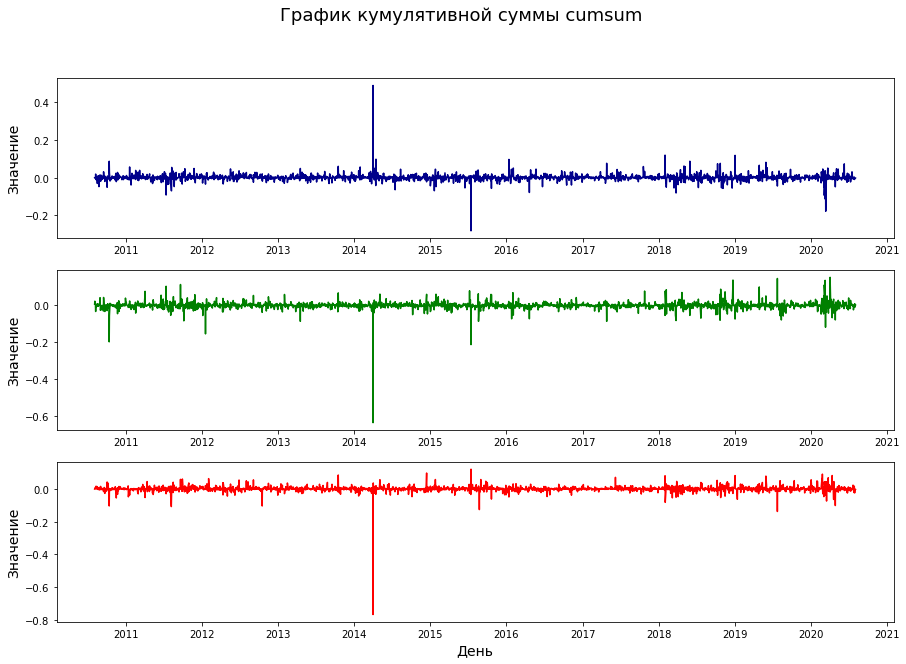

In [53]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
ax1.plot(GOOGLE.index,GOOGLE['cumsum1'], color='darkblue')
ax2.plot(GOOGLE.index,GOOGLE['cumsum2'], color='green')
ax3.plot(GOOGLE.index,GOOGLE['cumsum3'], color='red')
plt.xlabel('День',size=14)
plt.ylabel('Значение',size=14)
ax1.set_ylabel('Значение',size=14)
ax2.set_ylabel('Значение',size=14)
plt.suptitle('График кумулятивной суммы cumsum',size = 18)
plt.show()

### Задание 4
#### Коэффициент Sharpe Ratio 

In [54]:
Sharpe_Ratio = (GOOGLE['pnl1']/GOOGLE['pnl1'].std()).mean()
print('Sharpe Ratio =',Sharpe_Ratio)

Sharpe Ratio = 0.019651992017300546


#### Посчитаем sign()

In [55]:
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
GOOGLE['sign_r'] = GOOGLE['daily returns'].dropna().apply(lambda x: sign(x))
GOOGLE['f'] = 1
GOOGLE['f'] = GOOGLE['f'].iloc[:-1]*f1
GOOGLE['sign_f'] = GOOGLE['f'].dropna().apply(lambda x: sign(x))


#### Найдем hit rate

In [56]:
hit_rate = len(GOOGLE[GOOGLE['sign_f']==GOOGLE['sign_r']].index)/len(GOOGLE.index)
print('hit rate =',hit_rate)
        


hit rate = 0.5121176003178387


In [57]:
sign_r = GOOGLE['sign_r'].dropna().values
def hit_rate():
    global count
    count=0
    for i in range(len(f)):
        f[i]=sign(f[i])
        if f[i]==sign_r[i]:
            count+=1
    return count/len(f)
    
    

### Создадим множество реализаций f (создадим 100 реализаций)

In [58]:
Sharpe_Ratio_pnl = []
hit_rate_pnl = []
count=0
for i in range(100):
    f=[]
    for i in range(len(GOOGLE.dropna().index)):
        f.append(stats.norm.rvs(0,1))
    pnl=GOOGLE['daily returns'].dropna()*f
    Sharpe_Ratio_pnl.append((pnl/pnl.std()).mean())
    hit_rate_pnl.append(hit_rate())
    

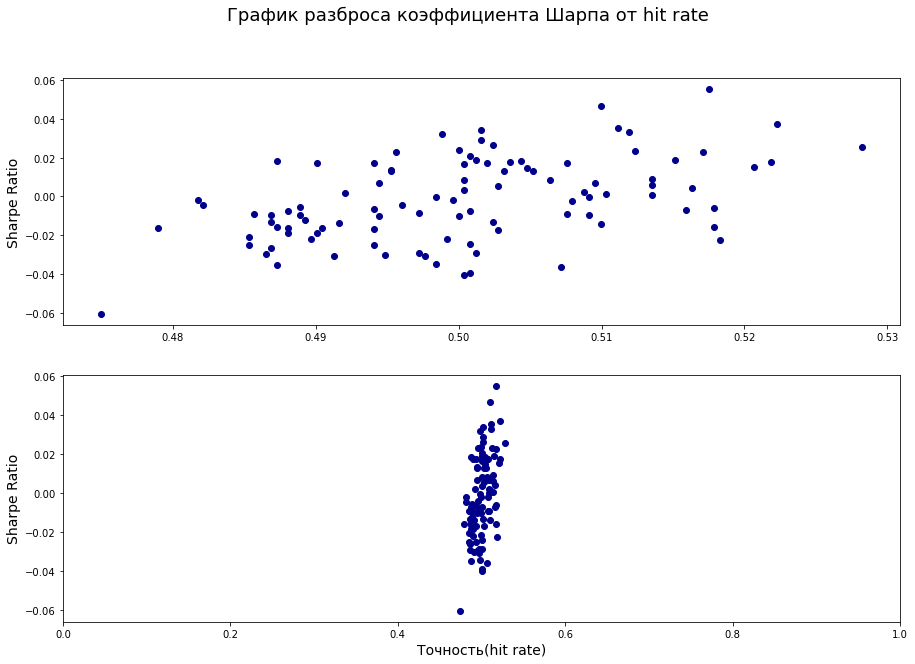

In [59]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.scatter(hit_rate_pnl,Sharpe_Ratio_pnl, color='darkblue')
ax2.scatter(hit_rate_pnl,Sharpe_Ratio_pnl, color='darkblue')
plt.xlim(0,1.0)
plt.xlabel('Точность(hit rate)',size=14)
plt.ylabel('Sharpe Ratio',size=14)
ax1.set_ylabel('Sharpe Ratio',size=14)
plt.suptitle('График разброса коэффициента Шарпа от hit rate',size = 18)
plt.show()

# Заключение
## Мы загрузили данные акций компаний Google, Apple и Facebook за последние 10 лет, проанализировали ежедневные изменения цен(daily returns) провели тесты Андерсона-Дарлинга и Шапиро-Вилка, а также построили графики квантиль-квантиль. Исходя из полученных результатов выяснили, что изменения цен и доходностей стремятся к нормальному распределению.
## Выяснили, что цены на акции имеют ярко выраженный восходящий тренд и сезонность, а график изменения цен( daily returns) стационарен времени.
## Посчитали коэффициент корреляции Спирмена, по которому не увидели взаимосвязи между данными.
## Сгенерировали случайные реализации по методу Гаусса , построили графики PNL (Profit and Loss), кумулятивной суммы PNL
## Посчитали коэффициент Шарпа и оценили как часто наш прогноз совпадает по направлению движения акции Google.

### ______

### Работу выполнил:
### Державин Никита
### +7(925)417-98-99
### nikita.derzh@mail.ru